In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from MyUtil import YahooData

ModuleNotFoundError: No module named 'pandas_datareader'

#### 야후 사이트에서 S&P500 지수 데이터를 읽어온다

In [ ]:
#sp500 = YahooData.getStockDataYahoo('^GSPC')
sp500 = pd.read_csv('./stockData/^GSPC.csv', index_col=0, parse_dates=True)

In [ ]:
sp500.head(10)

In [ ]:
kp200 = pd.read_csv('./stockData/kospi200.csv', index_col=0, parse_dates=True)

In [5]:
kp200.head()

,kpi200
Date,
2019-06-24,275.58
2019-06-21,275.48
2019-06-20,276.01
2019-06-19,275.31
2019-06-18,271.36


In [6]:
kp200 = kp200.sort_index() #코스피가 역순으로 정렬되어 있기 때문에 뒤집어줌.

In [7]:
kp200.head() #확인해보면 오름차순으로 정렬되어있다.

,kpi200
Date,
2006-01-03,178.81
2006-01-04,179.91
2006-01-05,178.82
2006-01-06,180.87
2006-01-09,180.30


In [8]:
kp200 = kp200['2007-01-03':] #s&p의 시작일... 인덱스로 끌어오기 때문에 1월 3일부터만 불러옴

In [9]:
df = pd.concat([kp200, sp500['Close']], axis=1) #concat : 이어붙여라, 리스트의 axis는 D1축으로 (왼쪽)

In [10]:
df.head()

,kpi200,Close
Date,,
2007-01-03,182.13,1416.599976
2007-01-04,180.52,1418.339966
2007-01-05,179.10,1409.709961
2007-01-08,177.08,1412.839966
2007-01-09,177.52,1412.109985


In [11]:
df[df.isnull().any(1)] #NAN 값의 이유는 공휴일차이! --- 전날 가격, 평균 등을 가져와 채워놓는 방법이 있다. 사실 빈 데이터가 왜곡되는 것이 찝찝하다면 데이터가 많을 경우 지워버리는 경우도 있다.

,kpi200,Close
Date,,
2007-01-15,179.82,NaN
2007-03-01,NaN,1403.170044
2007-04-06,191.63,NaN
2007-05-01,NaN,1486.300049
2007-05-24,NaN,1507.510010
2007-05-28,211.88,NaN
2007-06-06,NaN,1517.380005
2007-07-04,233.43,NaN
2007-07-17,NaN,1549.369995


In [12]:
df = df.fillna(method = 'ffill') #df의 na값을 무언가로 채워라(ffill: forward fill/ 전날 데이터로 오늘을 채워라)
if df.isnull().values.any():     #isnull이 있는지 다시 한번 확인=>true, false값으로 산출되는데, 그래도 true라면
    df = df.fillna(method = 'bfill')  #backward 값으로 가져와 채워라   or
    #df=df.dropna()

In [13]:
df.head()

,kpi200,Close
Date,,
2007-01-03,182.13,1416.599976
2007-01-04,180.52,1418.339966
2007-01-05,179.10,1409.709961
2007-01-08,177.08,1412.839966
2007-01-09,177.52,1412.109985


In [14]:
df.columns = ['kp200', 'sp500'] #columns 이름이 맘에 안들어 맘대로 바꿈

In [15]:
df.head()   #10배정도 차이나네, scaling해

,kp200,sp500
Date,,
2007-01-03,182.13,1416.599976
2007-01-04,180.52,1418.339966
2007-01-05,179.10,1409.709961
2007-01-08,177.08,1412.839966
2007-01-09,177.52,1412.109985


#### 2007-01-03일을 기준가로 가격 지수를 계산한다

In [16]:
df['kp200_index'] = df['kp200'] / df['kp200'].loc['2007-01-03']

In [17]:
df['sp500_index'] = df['sp500'] / df['sp500'].loc['2007-01-03']

In [18]:
df.head() #1을 기준으로 스케일링해줌

,kp200,sp500,kp200_index,sp500_index
Date,,,,
2007-01-03,182.13,1416.599976,1.000000,1.000000
2007-01-04,180.52,1418.339966,0.991160,1.001228
2007-01-05,179.10,1409.709961,0.983364,0.995136
2007-01-08,177.08,1412.839966,0.972273,0.997346
2007-01-09,177.52,1412.109985,0.974688,0.996830


#### 차트 확인

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
plt.figure(figsize=(10,5))
plt.plot(df['kp200_index'], label='KOPI200')
plt.plot(df['sp500_index'], label='S&P500')
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':', linewidth=1) # ' : ' = 점선모양 선
plt.show()

NameError: name 'plt' is not defined

#### 회귀분석

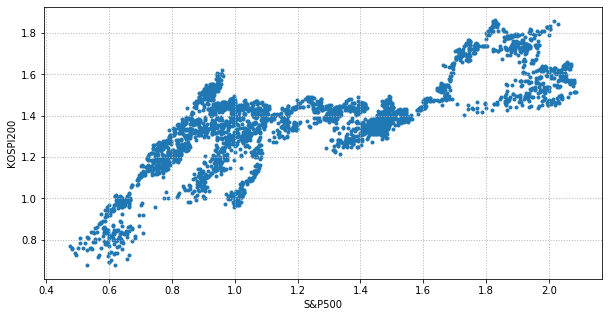

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(df['sp500_index'], df['kp200_index'], marker='.')  # scattef: 산포도
plt.grid(True, color='0.7', linestyle=':', linewidth=1)
plt.xlabel('S&P500') # x 축값
plt.ylabel('KOSPI200') #Y 축 값
plt.show()

### 회기분석

In [2]:
import numpy as np)
from sklearn.linear_model import LinearRegression

In [3]:
a= list(df['sp500_index']
type(a)

NameError: name 'df' is not defined

In [ ]:
a[:10]

In [4]:
a=np.array([1,2,3])
a

array([1, 2, 3])

In [ ]:
# 행렬 변환
x = np.array(df['sp500_index']).reshape(-1, 1) #df는 serise2차원 구조로 쓰고싶다. colomn 은 한걔로
y = np.array(df['kp200_index']).reshape(-1, 1)

In [28]:
x.shape

(3232, 1)

In [ ]:
x

2차원 구조로 객체생성

In [24]:
regr = LinearRegression() #회기분석
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regr.codf_ 
# 배열  의미있는건 

In [25]:
print('Slope :', regr.coef_[0][0]) #기울기가 0.39 기울기가 만나는 지점(y절펀)
print('Intercept :', regr.intercept_[0]) #intercept, Bias, 절편
print('R^2 : ', regr.score(x, y)) #R2 " 결정계수" 이러한 형식의 자료에서는 얘가 기준 57% 설명할 수 있다는 얘기

Slope : 0.3926123144653759
Intercept : 0.8786155296759581
R^2 :  0.5692119199742194


#### 회귀직선 시각화

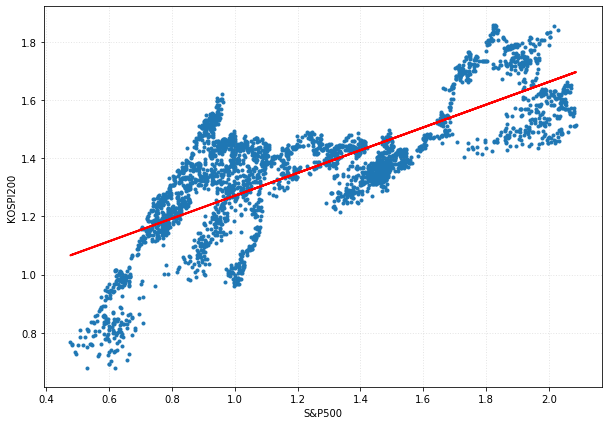

In [35]:
plt.figure(figsize=(10,7))
plt.scatter(x, y, marker='.')
plt.plot(x, regr.predict(x), color='r', linewidth=2) #직선 출력
plt.grid(True, color='grey', alpha=0.2, linestyle=':', linewidth=1)
plt.xlabel('S&P500')
plt.ylabel('KOSPI200')
plt.show()